In [1]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name="Chennai"]->.searchArea;
    (node["amenity"](area.searchArea);
     way["amenity"](area.searchArea);
     relation["amenity"](area.searchArea);
    );
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [2]:
len(data['elements'])                                        #2608
# response
# import Geopandas as gpd 
# gpd.GeoDataFrame(data.elements)
# data

3801

In [141]:
# print(len(overpass_query.ways))
# print(len(overpass_query.relations))
# print(len(response.nodes))
data['elements'][0]

{'type': 'node',
 'id': 243060332,
 'lat': 13.0334336,
 'lon': 80.2679457,
 'tags': {'amenity': 'bus_station',
  'created_by': 'Potlatch 0.10f',
  'name': 'Mylapore Bus Terminus'}}

# Study Area - Chennai

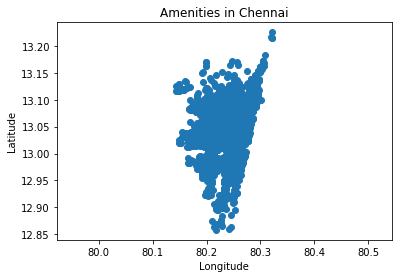

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Amenities in Chennai')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [7]:
import geopandas as gpd

In [12]:
df = gpd.GeoDataFrame(data['elements'])
df.head()

,center,id,lat,lon,members,nodes,tags,type
0,NaN,243060332,13.033434,80.267946,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node
1,NaN,247437516,13.082048,80.275597,NaN,NaN,"{'amenity': 'bus_station', 'name': 'Central St...",node
2,NaN,247677936,13.022402,80.276327,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node
3,NaN,247691507,13.066426,80.284329,NaN,NaN,"{'amenity': 'bus_station', 'name': 'Anna Squar...",node
4,NaN,247691544,13.051211,80.277839,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node


Geopandas is an extension of Pandas used to work with geospatial data 

In [14]:
fdf = pd.concat([df, df['tags'].apply(pd.Series)], axis=1)
fdf.head()

,center,id,lat,lon,members,nodes,tags,type,amenity,created_by,...,lit,smoothness,amenity_1,toilets:disposal,historic,capacity:disabled,capacity:parent,capacity:women,height,type
0,NaN,243060332,13.033434,80.267946,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node,bus_station,Potlatch 0.10f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,247437516,13.082048,80.275597,NaN,NaN,"{'amenity': 'bus_station', 'name': 'Central St...",node,bus_station,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,247677936,13.022402,80.276327,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node,bus_station,Potlatch 0.7a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,247691507,13.066426,80.284329,NaN,NaN,"{'amenity': 'bus_station', 'name': 'Anna Squar...",node,bus_station,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,247691544,13.051211,80.277839,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node,bus_station,Potlatch 0.7a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
fdf.columns

Index(['center', 'id', 'lat', 'lon', 'members', 'nodes', 'tags', 'type',
       'amenity', 'created_by',
       ...
       'lit', 'smoothness', 'amenity_1', 'toilets:disposal', 'historic',
       'capacity:disabled', 'capacity:parent', 'capacity:women', 'height',
       'type'],
      dtype='object', length=191)

Additional Information about the tags of these coordinates such as category of the amenity , its type etc

In [360]:
import geopandas as gpd
import json
import fiona                                  # Library to create interactive maps 
from shapely.geometry import shape                  # library to create geometric data types like Point , Polygon , Linestring  


collection = list(fiona.open('export.geojson','r'))
df1 = pd.DataFrame(collection)

#Check Geometry
def isvalid(geom):
    try:
        shape(geom)
        return 1
    except:
        return 0
df1['isvalid'] = df1['geometry'].apply(lambda x: isvalid(x))
df1 = df1[df1['isvalid'] == 1]
collection = json.loads(df1.to_json(orient='records'))

#Convert to geodataframe
gdf = gpd.GeoDataFrame.from_features(collection)
gdf

,@geometry,@id,@tainted,access,addr,addr:city,addr:country,addr:district,addr:full,addr:housename,...,type,unisex,vehicle,waste,website,wheelchair,wheelchair:description,wifi,wikidata,wikipedia
0,center,relation/2062934,None,None,None,None,None,None,None,None,...,multipolygon,None,None,None,None,None,None,None,Q4705572,en:Alagappa College of Technology
1,center,relation/5401208,None,None,None,None,None,None,None,None,...,multipolygon,None,None,None,None,None,None,None,None,None
2,center,relation/5492630,None,None,None,None,None,None,None,None,...,multipolygon,None,None,None,None,None,None,None,None,None
3,center,relation/9578956,None,None,None,None,None,None,None,None,...,multipolygon,None,None,None,None,None,None,None,None,None
4,center,way/23186297,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,center,way/23186298,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,center,way/23186325,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,center,way/23186327,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,center,way/23186336,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,center,way/23813849,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,Q7607090,None


In [260]:
fdf[fdf['amenity']!= 'place_of_worship']

,center,id,lat,lon,members,nodes,tags,type,amenity,created_by,...,lit,smoothness,amenity_1,toilets:disposal,historic,capacity:disabled,capacity:parent,capacity:women,height,type
0,NaN,243060332,13.033434,80.267946,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node,bus_station,Potlatch 0.10f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,247437516,13.082048,80.275597,NaN,NaN,"{'amenity': 'bus_station', 'name': 'Central St...",node,bus_station,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,247677936,13.022402,80.276327,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node,bus_station,Potlatch 0.7a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,247691507,13.066426,80.284329,NaN,NaN,"{'amenity': 'bus_station', 'name': 'Anna Squar...",node,bus_station,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,247691544,13.051211,80.277839,NaN,NaN,"{'amenity': 'bus_station', 'created_by': 'Potl...",node,bus_station,Potlatch 0.7a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,248343706,13.036873,80.255560,NaN,NaN,"{'amenity': 'fuel', 'created_by': 'Potlatch 0....",node,fuel,Potlatch 0.7b,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,248343893,13.037841,80.256297,NaN,NaN,"{'amenity': 'fuel', 'created_by': 'Potlatch 0....",node,fuel,Potlatch 0.10f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,248344281,13.037888,80.256951,NaN,NaN,"{'amenity': 'fuel', 'created_by': 'Potlatch 0....",node,fuel,Potlatch 0.7b,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,248559397,13.072024,80.198037,NaN,NaN,"{'amenity': 'clinic', 'is_in': 'Chennai', 'nam...",node,clinic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,248643383,13.039146,80.257284,NaN,NaN,"{'amenity': 'atm', 'name': 'HDFC'}",node,atm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
temp = df1['geometry'].apply(pd.Series)
temp = temp['coordinates'].apply(pd.Series)
temp.rename(columns={0:'Longitude',1:'Latitude'},inplace=True)


In [142]:
temp.head()

,Longitude,Latitude
1,80.238843,13.008152
2,80.226643,13.073484
3,80.276357,13.053945
4,80.204242,13.016775
5,80.231523,13.042298


In [24]:
from sklearn.preprocessing import StandardScaler

#Standardising the data for fitting
coords_scaled= temp
coords_scaled = StandardScaler().fit_transform(coords_scaled)
coords_scaled

array([[ 0.09204569, -0.63878751],
       [-0.29847125,  0.69702503],
       [ 1.29280406,  0.29751787],
       ...,
       [ 0.84639107,  0.75423594],
       [-0.08174323, -1.76168005],
       [ 0.58235803, -1.76256333]])

In [27]:
from sklearn.cluster import DBSCAN, KMeans 


cluster_errors = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i).fit(coords_scaled)
    centroids = kmeans.cluster_centers_
    cluster_errors.append(kmeans.inertia_)
 

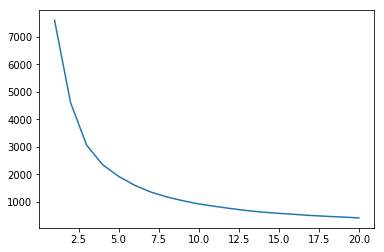

In [28]:
plt.plot(range(1,21),cluster_errors);

In [229]:
# Choosing K = 8 

kmclustering = KMeans(n_clusters=12).fit(coords_scaled)
centroids = kmclustering.cluster_centers_

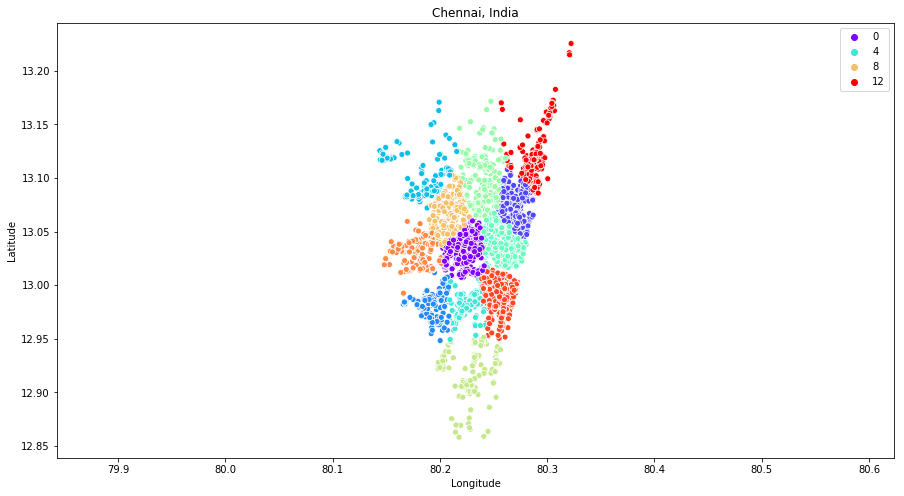

In [230]:
plt.figure(figsize=(15, 8))
sns.scatterplot(temp.iloc[:,0],temp.iloc[:,1], hue=kmclustering.labels_,palette='rainbow')
plt.title('Chennai, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [231]:
from sklearn import metrics

coefficient = metrics.silhouette_score(np.flip(coords), kmclustering.labels_)
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(np.flip(coords), kmclustering.labels_)))

Silhouette coefficient: 0.374


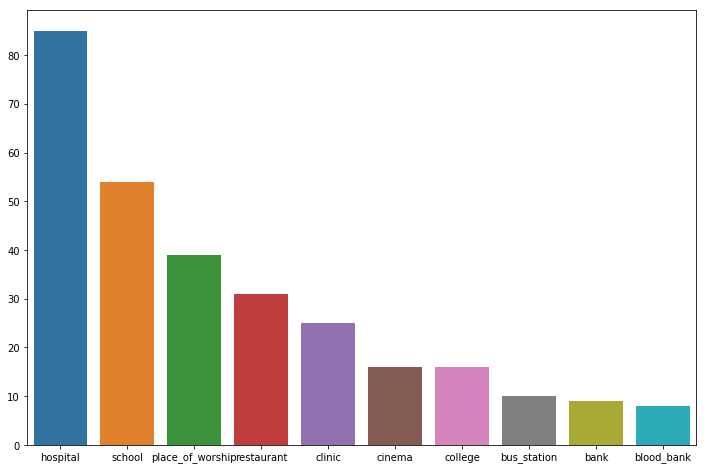

In [108]:
gdf[gdf['km_clusters']==4]['amenity'].value_counts()[:10]

import seaborn as sns 
plt.figure(figsize =  (12,8))
sns.barplot(x =gdf[gdf['km_clusters']==7]['amenity'].value_counts().index[:10], y= gdf[gdf['km_clusters']==7]['amenity'].value_counts().values[:10],data = gdf)

It seems that the clusters have a good mix of commercial elements like restaurents, ATM , banks , hospital , fuel , cafes etc 

Place of worship is dominant in all clusters indicating the cultural setting of the city and its role in settlement of the population 

K-means is not the ideal data for Coordinates data because it minimizes variances and not the Geodetic distance 

There is considerable amount of distortion with the latitudes that are far away from the equator 

Instead, let’s use an algorithm that works better with arbitrary distances: scikit-learn’s implementation of the DBSCAN algorithm. DBSCAN clusters a spatial data set based on two parameters: a physical distance from each point, and a minimum cluster size. This method works much better for spatial latitude-longitude data.


# DBSCAN

In [169]:
np.flip(coords)

array([[80.2388431, 13.0081519],
       [80.2266426, 13.0734845],
       [80.2763571, 13.0539452],
       ...,
       [80.2624103, 13.0762826],
       [80.2334136, 12.9532329],
       [80.2541614, 12.9531897]])

In [363]:
from sklearn.cluster import DBSCAN, KMeans 

dbclustering = DBSCAN(eps=0.05, min_samples=2).fit(coords_scaled)


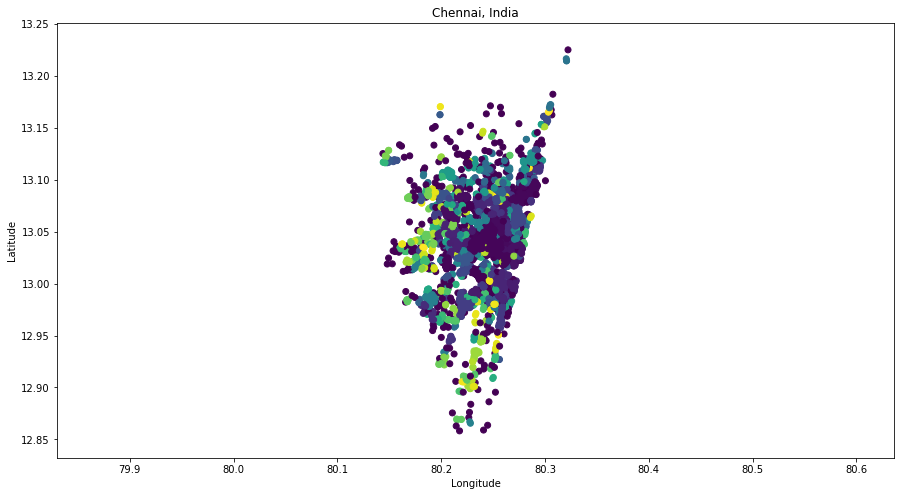

In [364]:

plt.figure(figsize=(15, 8))
plt.scatter(temp.iloc[:,0], temp.iloc[:,1], c=dbclustering.labels_.astype(float))
plt.title('Chennai, India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

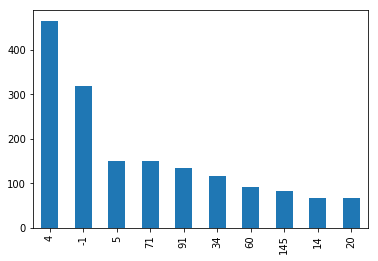

In [365]:
gdf['dbclusters'] = dbclustering.labels_
gdf['dbclusters'].value_counts()[:10].plot(kind='bar')                    # Top 10 clusters 

In [390]:
# # Setup figure and ax
# f, ax = plt.subplots(1, figsize=(9, 9))
# # Plot unique values choropleth including a legend and with no boundary lines
# gdf.plot(column='dbclusters', categorical=True, legend=True, linewidth=0, axes=ax)
# # Remove axis
# ax.set_axis_off()
# # Keep axes proportionate
# plt.axis('equal')
# # Add title
# plt.title('Chennai classification')
# # Display the map
# plt.show()

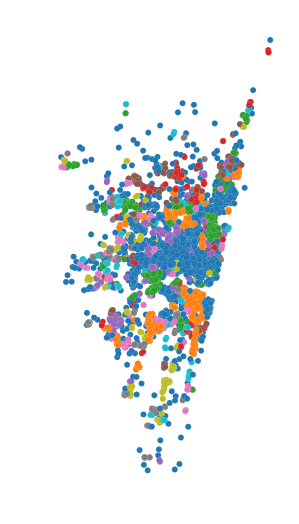

In [389]:
f, ax = plt.subplots(1, figsize=(9, 9))

gdf.assign(cl=dbclustering.labels_)\
   .plot(column='cl', categorical=True, legend=False, \
         linewidth=0.1, edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

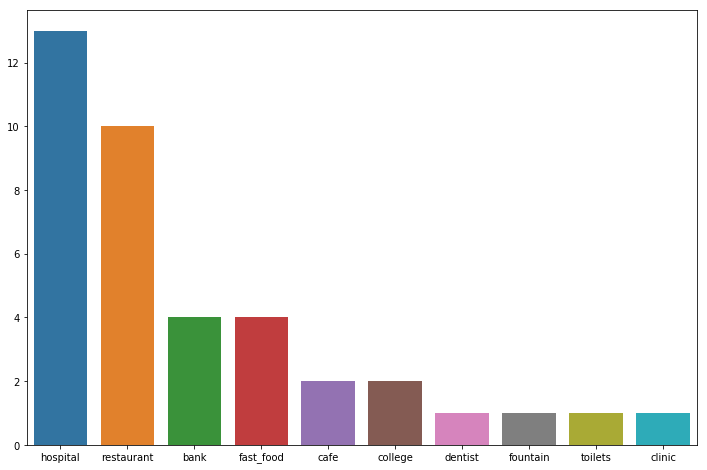

In [394]:
plt.figure(figsize =  (12,8))

sns.barplot(x =gdf[gdf['dbclusters']==10]['amenity'].value_counts().index[:10], y= gdf[gdf['dbclusters']==10]['amenity'].value_counts().values[:10],data = gdf)

In [204]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster


boulder_coords = [13.0521, 80.2255]

#Create the map
km_map = folium.Map(location = boulder_coords, zoom_start = 13)

#Display the map
km_map

In [361]:
gdf['km_clusters'] = kmclustering.labels_

In [38]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
coords = temp.as_matrix()
coords

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


array([[80.2388431, 13.0081519],
       [80.2266426, 13.0734845],
       [80.2763571, 13.0539452],
       ...,
       [80.2624103, 13.0762826],
       [80.2334136, 12.9532329],
       [80.2541614, 12.9531897]])

In [388]:
# gdf[gdf.clusters == 3]['amenity']

# HDBSCAN

HDBScan has the parameter minimum cluster size, which is how big a cluster needs to be in order to form. This is more intuitive

than epsilon because we can probably how many shops or commercial establishments the clusters need to have rather than defining 

the radius to make actionable decisions on them.

In [366]:
import hdbscan

hd = hdbscan.HDBSCAN(min_cluster_size=10)
hdlabels = hd.fit(coords_scaled)

In [367]:
len(gdf)

3801

In [373]:
gdf.columns

Index(['@geometry', '@id', '@tainted', 'access', 'addr', 'addr:city',
       'addr:country', 'addr:district', 'addr:full', 'addr:housename',
       ...
       'waste', 'website', 'wheelchair', 'wheelchair:description', 'wifi',
       'wikidata', 'wikipedia', 'km_clusters', 'dbclusters', 'hdlabels'],
      dtype='object', length=191)

In [370]:
# Type of commercial establishments of our interest 

col = ['hospital','pub','cafe','events_venue','bus_station','Bus_Terminus','marketplace','bank','restaurant','shop','commercial','theatre','cinema','fast_food','food_court','nightclub','dress showrrom']

In [372]:
# Filtering out the noise which is defined by the cluster tagged -1

gdf['hdlabels'] = hdlabels.labels_
hdgdf = gdf[gdf['hdlabels']>=0]

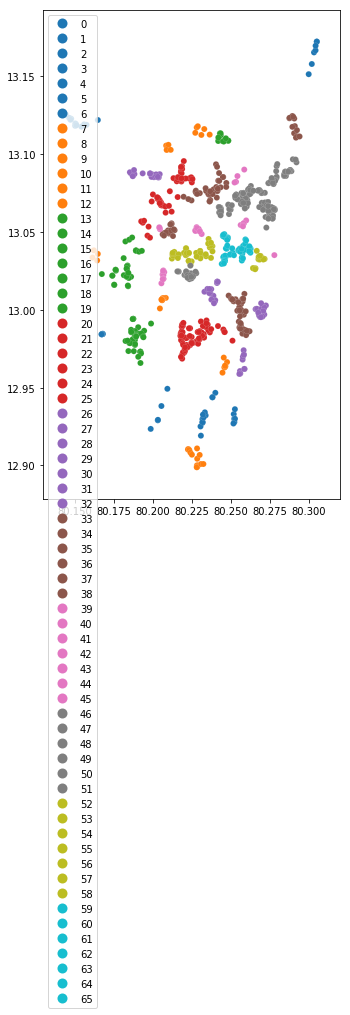

In [376]:
f, ax = plt.subplots(1, figsize=(9, 9))

hdgdf = gdf.assign(cl=hdlabels.labels_)[gdf['amenity'].isin(col)]
hdgdf[hdgdf['hdlabels']>=0].plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, edgecolor='white', ax=ax)



plt.show()

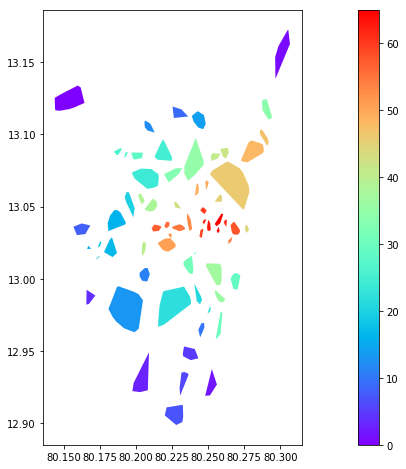

In [380]:
polyfile = gdf[gdf['hdlabels']>=0][['hdlabels','geometry']].dissolve(by='hdlabels',aggfunc='sum').convex_hull

poly = gpd.GeoDataFrame(polyfile,crs = {'init': 'epsg:4326'})
poly.rename({0:'geometry'},axis=1,inplace=True)

dbc = set(gdf[gdf['hdlabels']>=0]['hdlabels'])

poly['hdbc'] = dbc

poly.plot(column='hdbc',cmap='rainbow',figsize=(20,8),legend=True)

In [395]:
# Polygon shapefile of clusters 
poly.to_file(filename='polygon_of_clusters.shp', driver="ESRI Shapefile")

poly

,geometry,hdbc
hdlabels,,
0,"POLYGON ((80.14601 13.11642, 80.14420 13.11692...",0
1,"POLYGON ((80.29668 13.13847, 80.29648 13.15349...",1
2,"POLYGON ((80.24805 12.91912, 80.25266 12.93763...",2
3,"POLYGON ((80.20308 12.92166, 80.19840 12.92222...",3
4,"POLYGON ((80.16575 12.98223, 80.16597 12.99249...",4
5,"POLYGON ((80.23812 12.94378, 80.23807 12.94379...",5
6,"POLYGON ((80.23068 12.91914, 80.23034 12.92478...",6
7,"POLYGON ((80.22802 12.89886, 80.22008 12.90552...",7
8,"POLYGON ((80.15926 13.03032, 80.15685 13.03614...",8


In [382]:
gdf[gdf['hdlabels']==45]['amenity'].value_counts()

restaurant    3
library       3
hospital      2
atm           2
school        1
parking       1
cinema        1
college       1
theatre       1
Name: amenity, dtype: int64

# Significance of the clusters 

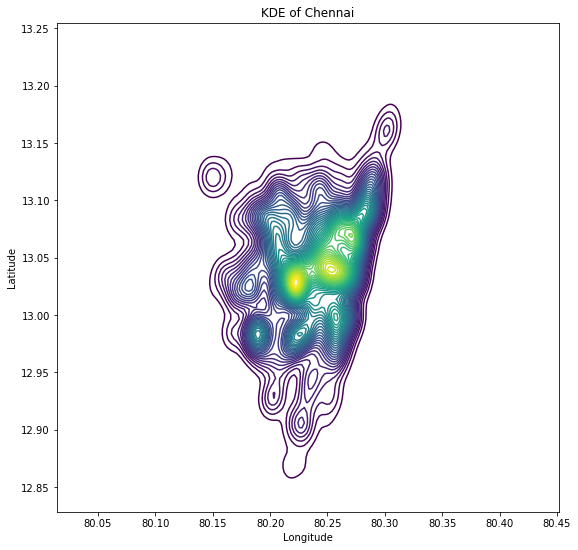

In [330]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(9, 9))
# Add a base layer with the LSOA geography
gdf.plot(ax=ax, facecolor='white', alpha=0, linewidth=0.1)
# Generate KDE
sns.kdeplot(temp['Longitude'], temp['Latitude'], ax=ax, \
            n_levels=50, shade=False, cmap='viridis')
# Remove axes
# Add title
ax.set_title("KDE of Chennai")
# Keep axes proportionate
plt.axis('equal')
# Draw map
plt.show()

We can aim at estimating the continuous observed probability distribution. The most commonly used method to do this is the so called kernel density estimate (KDE). The idea behind KDEs is to count the number of points in a continious way. Instead of using discrete counting, where you include a point in the count if it is inside a certain boundary and ignore it otherwise, KDEs use functions (kernels) that include points but give different weights to each one depending of how far of the location where we are counting the point is.

The isoclines represent probability of the establishments appearing in those regions are similar and the brighter region denotes the areas with higher probability and the clusters in the central part of chennai seems to have a higher probability of finding commercial establishments 

In [384]:
ess = gdf[gdf['amenity'].isin(col)][['amenity','geometry']]

ess['lat'] = ess['geometry'].y
ess['lon'] = ess['geometry'].x
ess.head()

,amenity,geometry,lat,lon
65,hospital,POINT (80.27733 13.08090),13.080897,80.277328
67,bus_station,POINT (80.28408 13.08690),13.086900,80.284083
68,bus_station,POINT (80.28526 13.08588),13.085884,80.285263
81,bus_station,POINT (80.25294 13.00672),13.006716,80.252939
90,Bus_Terminus,POINT (80.26574 13.02663),13.026626,80.265738


In [354]:
# Heat map showing the commercial establishments of our interest 

from folium import plugins
from folium.plugins import HeatMap



# ess['lat'] = ess['lat'].astype(float)
# ess['lon'] = ess['lon'].astype(float)
map3 = folium.Map(location=[13.0521, 80.2255], zoom_start=12)

heat = ess[['lat', 'lon']].as_matrix() 

HeatMap(heat).add_to(map3)  
map3
# gdf['amenity'].unique()

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [396]:
map3.save('heatmap.html')